# Insurance Claims- Fraud Detection

Problem Statement:

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'Z:\ML Datasets\Insurance.csv')

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
#Replacing '?' with 'nan'

df = df.replace('?', np.nan)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
#dropping useless column
df = df. drop(['_c39'], axis = 1)

#replacing Nan values with mode
df['collision_type']          = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage']         = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [8]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [9]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

# EDA

<AxesSubplot:xlabel='months_as_customer', ylabel='fraud_reported'>

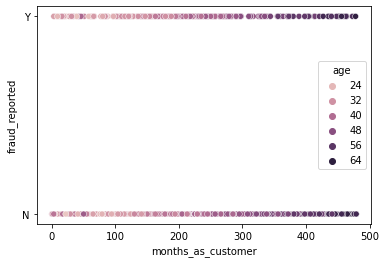

In [10]:
sns.scatterplot(data = df, x = 'months_as_customer', y = 'fraud_reported', hue = 'age')

<AxesSubplot:xlabel='age', ylabel='count'>

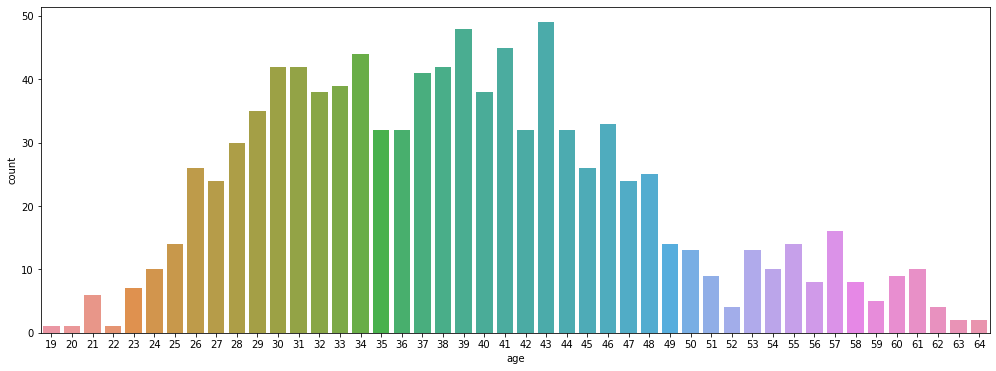

In [11]:
plt.figure(figsize=(17,6))
sns.countplot(df['age'])

<AxesSubplot:xlabel='policy_state', ylabel='count'>

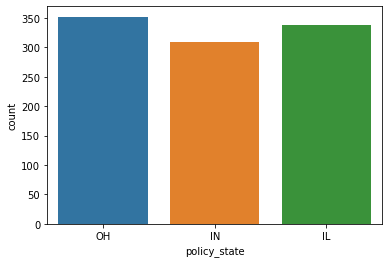

In [12]:
sns.countplot(x='policy_state',data=df)

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

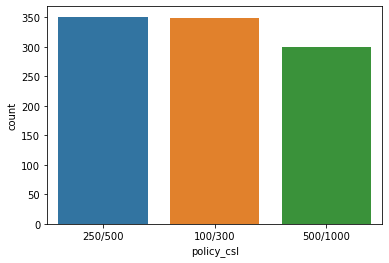

In [13]:
sns.countplot(x='policy_csl',data=df)


<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

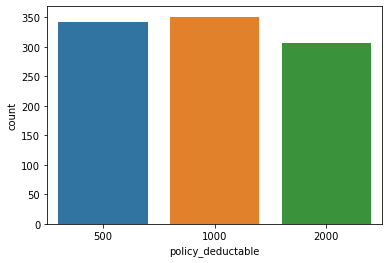

In [14]:
sns.countplot(x='policy_deductable',data=df)


<AxesSubplot:xlabel='policy_annual_premium', ylabel='fraud_reported'>

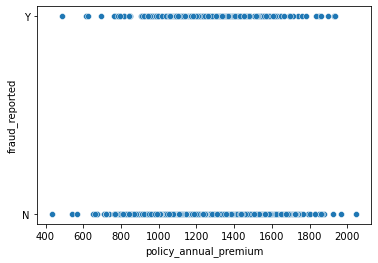

In [15]:
sns.scatterplot(data=df, x='policy_annual_premium', y='fraud_reported')


<AxesSubplot:xlabel='umbrella_limit', ylabel='count'>

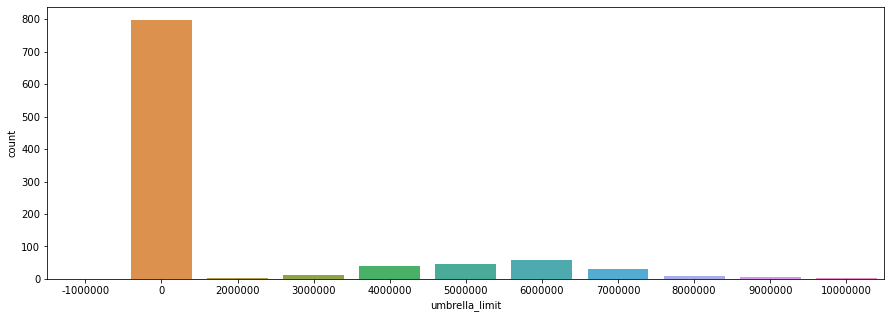

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x='umbrella_limit',data=df)

<AxesSubplot:xlabel='insured_zip', ylabel='fraud_reported'>

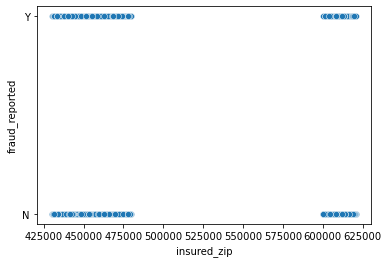

In [17]:
sns.scatterplot(data=df, x='insured_zip', y='fraud_reported')


<AxesSubplot:xlabel='insured_sex', ylabel='count'>

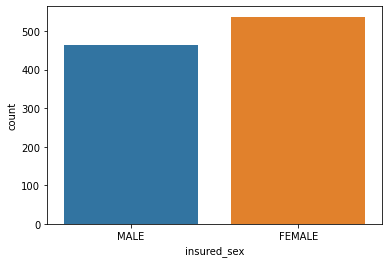

In [18]:
sns.countplot(x='insured_sex',data=df)


<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

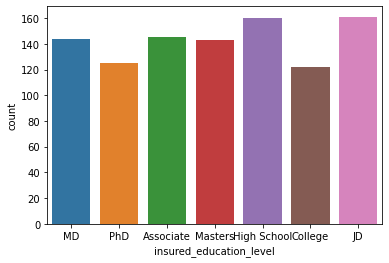

In [19]:
sns.countplot(x='insured_education_level',data=df)


<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

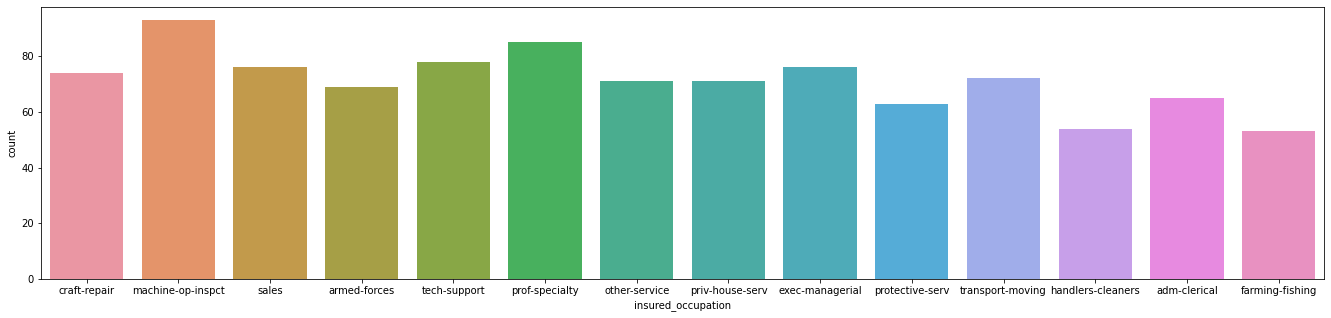

In [20]:
plt.figure(figsize=(23,5))
sns.countplot(x='insured_occupation',data=df)

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

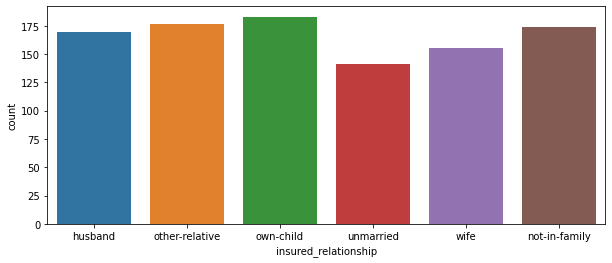

In [21]:
plt.figure(figsize=(10,4))
sns.countplot(x='insured_relationship',data=df)

<AxesSubplot:xlabel='capital-gains', ylabel='fraud_reported'>

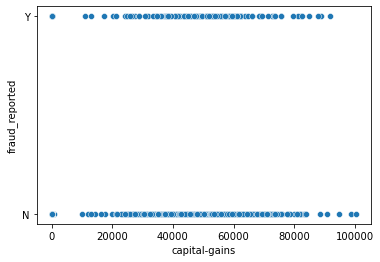

In [22]:
sns.scatterplot(data=df, x='capital-gains', y='fraud_reported')


<AxesSubplot:xlabel='capital-loss', ylabel='fraud_reported'>

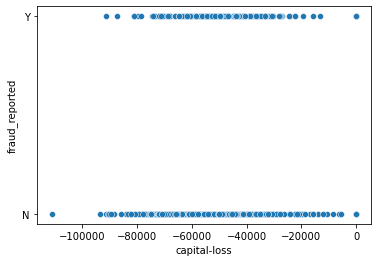

In [23]:
sns.scatterplot(data=df, x='capital-loss', y='fraud_reported')


<AxesSubplot:xlabel='incident_type', ylabel='count'>

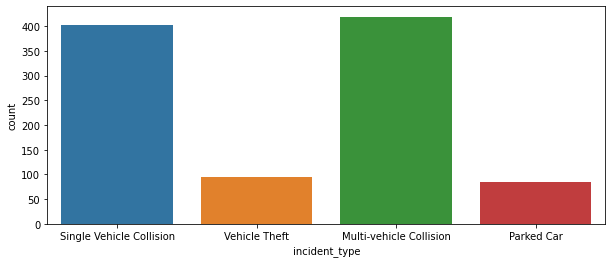

In [24]:
plt.figure(figsize=(10,4))
sns.countplot(x='incident_type',data=df)

<AxesSubplot:xlabel='collision_type', ylabel='count'>

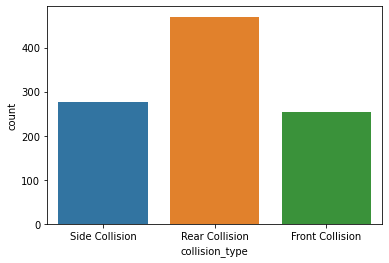

In [25]:
sns.countplot(x='collision_type',data=df)


<AxesSubplot:xlabel='incident_severity', ylabel='count'>

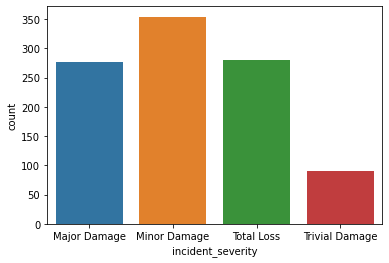

In [26]:
sns.countplot(x='incident_severity',data=df)


<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

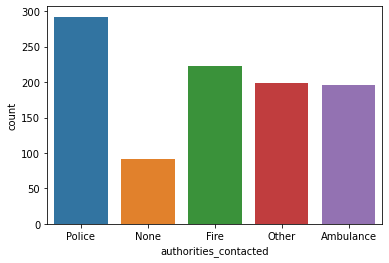

In [27]:
sns.countplot(x='authorities_contacted',data=df)


<AxesSubplot:xlabel='incident_state', ylabel='count'>

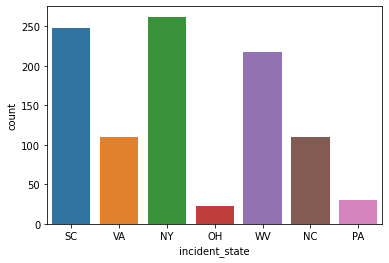

In [28]:
sns.countplot(x='incident_state',data=df)


<AxesSubplot:xlabel='incident_city', ylabel='count'>

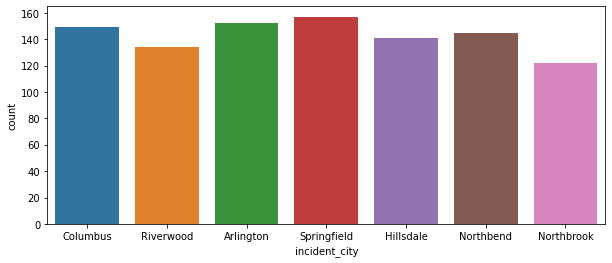

In [29]:
plt.figure(figsize=(10,4))
sns.countplot(x='incident_city',data=df)

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

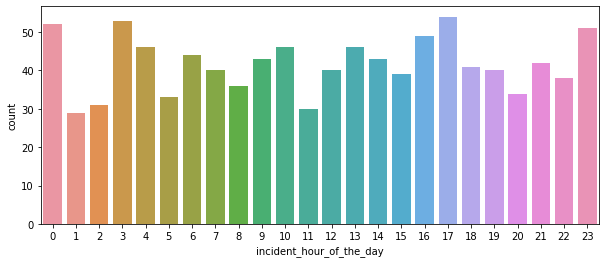

In [30]:
plt.figure(figsize=(10,4))
sns.countplot(x='incident_hour_of_the_day',data=df)

<AxesSubplot:xlabel='property_damage', ylabel='count'>

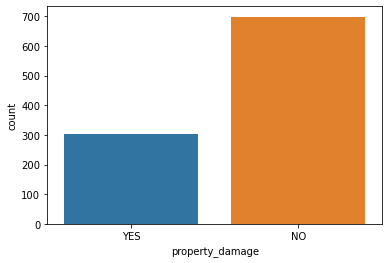

In [31]:
sns.countplot(x='property_damage',data=df)


<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

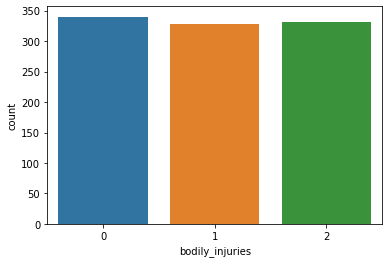

In [32]:
sns.countplot(x='bodily_injuries',data=df)


<AxesSubplot:xlabel='witnesses', ylabel='count'>

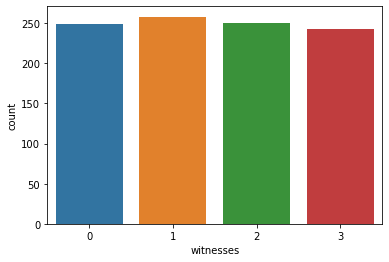

In [33]:
sns.countplot(x='witnesses',data=df)


<AxesSubplot:xlabel='police_report_available', ylabel='count'>

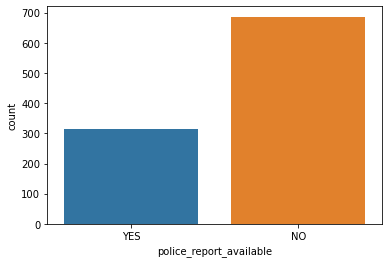

In [34]:
sns.countplot(x='police_report_available',data=df)


<AxesSubplot:xlabel='total_claim_amount', ylabel='fraud_reported'>

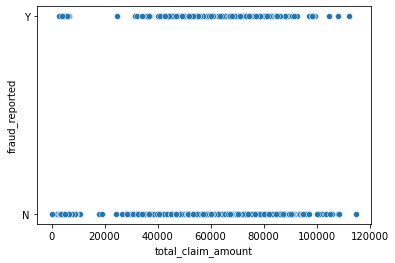

In [35]:
sns.scatterplot(data=df, x='total_claim_amount', y='fraud_reported')


<AxesSubplot:xlabel='injury_claim', ylabel='fraud_reported'>

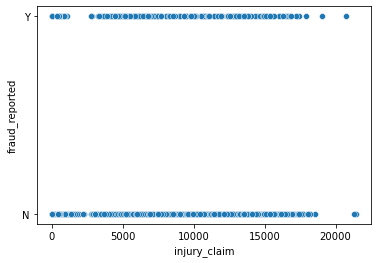

In [36]:
sns.scatterplot(data=df, x='injury_claim', y='fraud_reported')


<AxesSubplot:xlabel='property_claim', ylabel='fraud_reported'>

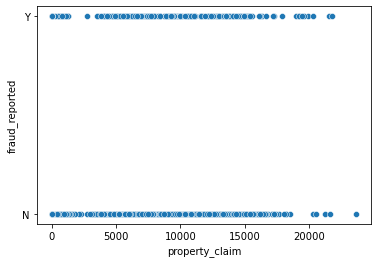

In [37]:
sns.scatterplot(data=df, x='property_claim', y='fraud_reported')


<AxesSubplot:xlabel='vehicle_claim', ylabel='fraud_reported'>

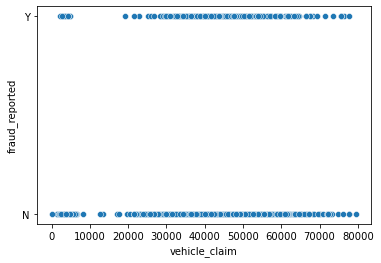

In [38]:
sns.scatterplot(data=df, x='vehicle_claim', y='fraud_reported')


<AxesSubplot:xlabel='auto_make', ylabel='count'>

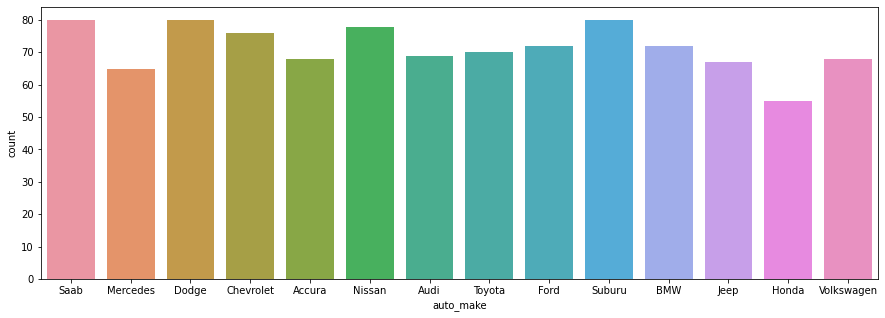

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(x='auto_make',data=df)

<AxesSubplot:xlabel='auto_model', ylabel='count'>

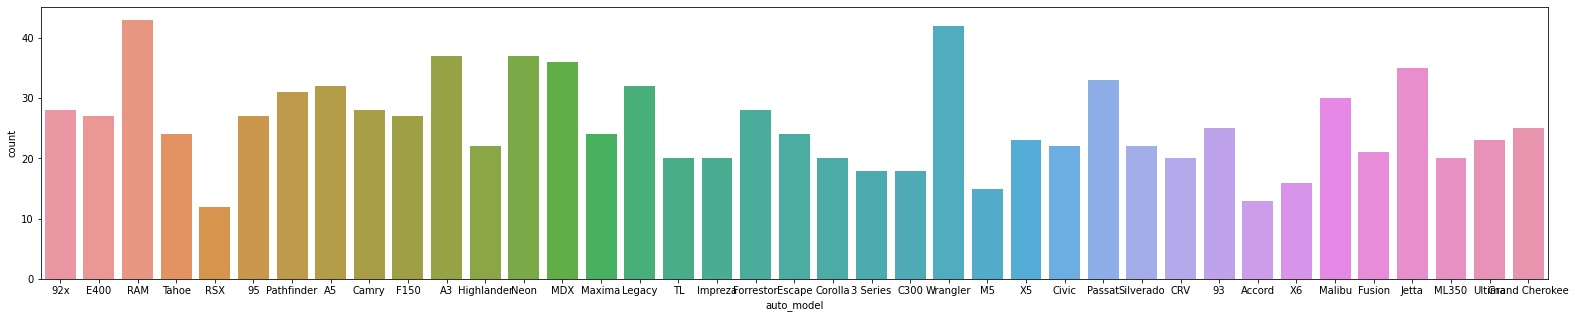

In [40]:
plt.figure(figsize=(27,5))
sns.countplot(x='auto_model',data=df)

<AxesSubplot:xlabel='auto_year', ylabel='count'>

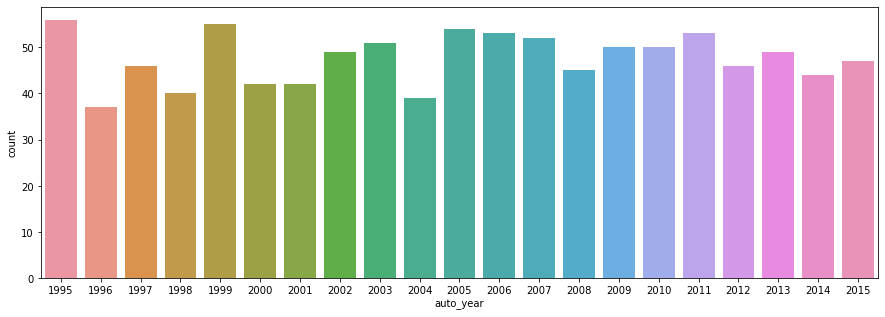

In [41]:
plt.figure(figsize=(15,5))
sns.countplot(x='auto_year',data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

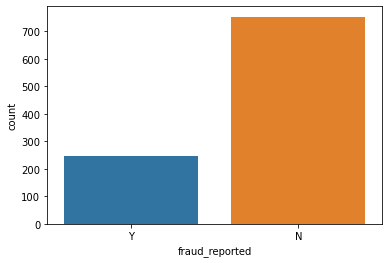

In [42]:
sns.countplot(x='fraud_reported',data=df)


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,299,29,480,532,2,1,1,732,1,486,...,2,1,563,258,512,545,10,1,9,1
1,212,23,257,821,1,1,2,396,5,519,...,0,0,44,46,45,38,8,12,12,1
2,123,10,672,186,2,0,2,740,5,6,...,3,0,143,337,104,116,4,30,12,0
3,239,22,140,766,0,1,2,743,6,812,...,2,0,451,245,249,521,3,34,19,1
4,212,25,286,181,0,2,1,902,6,850,...,1,0,81,70,36,66,0,31,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,19,935,487,2,2,1,577,1,19,...,1,0,705,624,379,664,6,6,11,0
996,266,22,101,129,0,0,1,765,1,813,...,3,0,760,630,608,714,13,28,20,0
997,119,15,902,509,2,1,0,691,3,181,...,3,1,507,324,330,554,11,19,1,0
998,377,43,500,573,0,2,2,652,5,157,...,1,1,224,168,170,256,1,5,3,0


# Correlation

In [44]:
df.corr()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.911296,0.059023,0.053206,-0.000783,-0.026295,0.016873,0.014294,0.017145,0.015904,...,0.057284,-0.020217,0.055934,0.064041,0.029788,0.052742,0.044443,0.001095,0.002020,0.017095
age,0.911296,1.000000,0.061380,0.056538,-0.014533,-0.015185,0.020561,0.017822,0.021924,0.013517,...,0.052359,-0.020441,0.071265,0.075124,0.060450,0.059784,0.030410,0.017343,0.001354,0.012143
policy_number,0.059023,0.061380,1.000000,0.045938,0.073149,0.038834,-0.015075,0.018033,0.013341,-0.000690,...,-0.013730,0.032356,-0.009532,-0.012413,-0.003358,-0.014299,0.024663,0.064259,0.000465,-0.030222
policy_bind_date,0.053206,0.056538,0.045938,1.000000,0.015289,0.008486,-0.016906,-0.032003,-0.024888,-0.032670,...,-0.007004,-0.011563,0.009868,0.026021,0.016972,0.009028,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000783,-0.014533,0.073149,0.015289,1.000000,0.001027,0.008213,0.014751,-0.031793,0.025074,...,0.022960,0.069017,-0.015990,-0.042685,0.009282,-0.007492,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026295,-0.015185,0.038834,0.008486,0.001027,1.000000,0.001986,0.017161,0.022779,0.006474,...,0.071500,-0.001645,-0.043541,-0.076419,-0.041428,-0.027320,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.016873,0.020561,-0.015075,-0.016906,0.008213,0.001986,1.000000,0.003182,0.009402,-0.004227,...,0.074994,0.040129,0.020877,0.028482,0.058976,0.004261,-0.030775,-0.003892,0.024921,0.007620
policy_annual_premium,0.014294,0.017822,0.018033,-0.032003,0.014751,0.017161,0.003182,1.000000,-0.003712,0.043082,...,0.012004,0.016026,-0.001025,-0.021839,-0.006593,0.009413,0.007216,-0.030185,-0.031015,-0.015261
umbrella_limit,0.017145,0.021924,0.013341,-0.024888,-0.031793,0.022779,0.009402,-0.003712,1.000000,0.010062,...,-0.005779,-0.042278,-0.036495,-0.048003,-0.018668,-0.031991,-0.007169,0.042421,0.010528,0.057719
insured_zip,0.015904,0.013517,-0.000690,-0.032670,0.025074,0.006474,-0.004227,0.043082,0.010062,1.000000,...,0.022141,-0.009889,-0.005345,-0.005417,-0.014892,-0.017019,-0.028966,0.029470,-0.027803,0.061767


In [45]:
df.corr().sum()

months_as_customer             2.356493
age                            2.452831
policy_number                  1.341755
policy_bind_date               1.192467
policy_state                   1.149788
policy_csl                     0.996881
policy_deductable              1.113547
policy_annual_premium          1.314918
umbrella_limit                 0.839745
insured_zip                    0.966331
insured_sex                    1.141058
insured_education_level        1.342113
insured_occupation             0.813617
insured_hobbies                0.839836
insured_relationship           0.814573
capital-gains                  1.142464
capital-loss                   0.334034
incident_date                  0.948222
incident_type                 -0.637840
collision_type                 1.048434
incident_severity             -0.896088
authorities_contacted          0.775171
incident_state                 0.970604
incident_city                  1.270667
incident_location              1.362271


<AxesSubplot:>

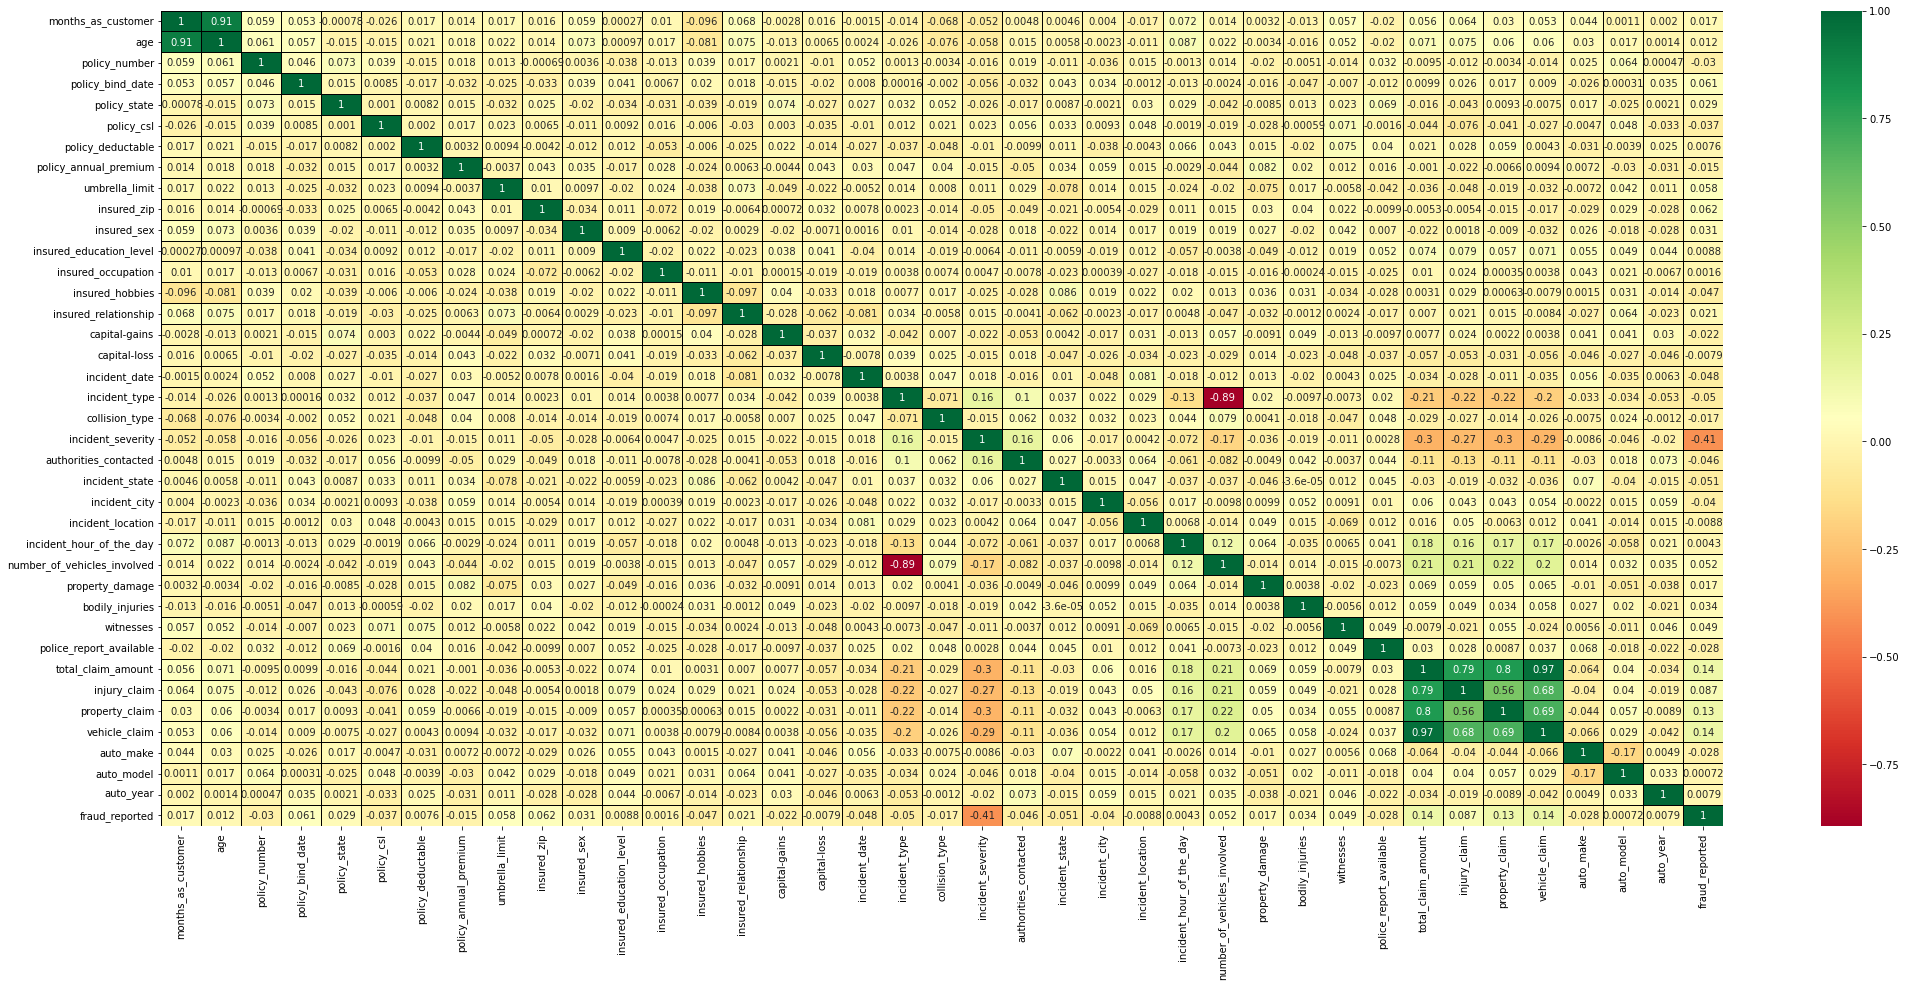

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(35,15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor="black", cmap = 'RdYlGn')

In [47]:
x = df.drop(['fraud_reported'], axis = 1)

In [48]:
def correlation(dataset, threshold):              #creating fucntion with 2 values
    corr_columns = set()                          #set of all the names of correlated columns
    corr = dataset.corr()                         #correlation function
    for i in range (len(corr.columns)):           #i and j are the columns from x and y axes 
        for j in range(i):
            if abs(corr.iloc[i,j]) > threshold:   #absolute coefficient values
                columns = corr.columns[i]         #getting the name of the columns
                corr_columns.add(columns)
    return corr_columns

In [49]:
corr_feat = correlation(x, 0.8)
corr_feat

{'age', 'number_of_vehicles_involved', 'vehicle_claim'}

In [50]:
df1 = df.drop(corr_feat, axis =1)
df1.head(2)

,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,auto_year,fraud_reported
0,299,480,532,2,1,1,732,1,486,1,...,1,2,1,563,258,512,10,1,9,1
1,212,257,821,1,1,2,396,5,519,1,...,0,0,0,44,46,45,8,12,12,1


# Outliers

months_as_customer                AxesSubplot(0.125,0.799681;0.133621x0.0803191)
age                            AxesSubplot(0.285345,0.799681;0.133621x0.0803191)
policy_number                   AxesSubplot(0.44569,0.799681;0.133621x0.0803191)
policy_bind_date               AxesSubplot(0.606034,0.799681;0.133621x0.0803191)
policy_state                   AxesSubplot(0.766379,0.799681;0.133621x0.0803191)
policy_csl                        AxesSubplot(0.125,0.703298;0.133621x0.0803191)
policy_deductable              AxesSubplot(0.285345,0.703298;0.133621x0.0803191)
policy_annual_premium           AxesSubplot(0.44569,0.703298;0.133621x0.0803191)
umbrella_limit                 AxesSubplot(0.606034,0.703298;0.133621x0.0803191)
insured_zip                    AxesSubplot(0.766379,0.703298;0.133621x0.0803191)
insured_sex                       AxesSubplot(0.125,0.606915;0.133621x0.0803191)
insured_education_level        AxesSubplot(0.285345,0.606915;0.133621x0.0803191)
insured_occupation          

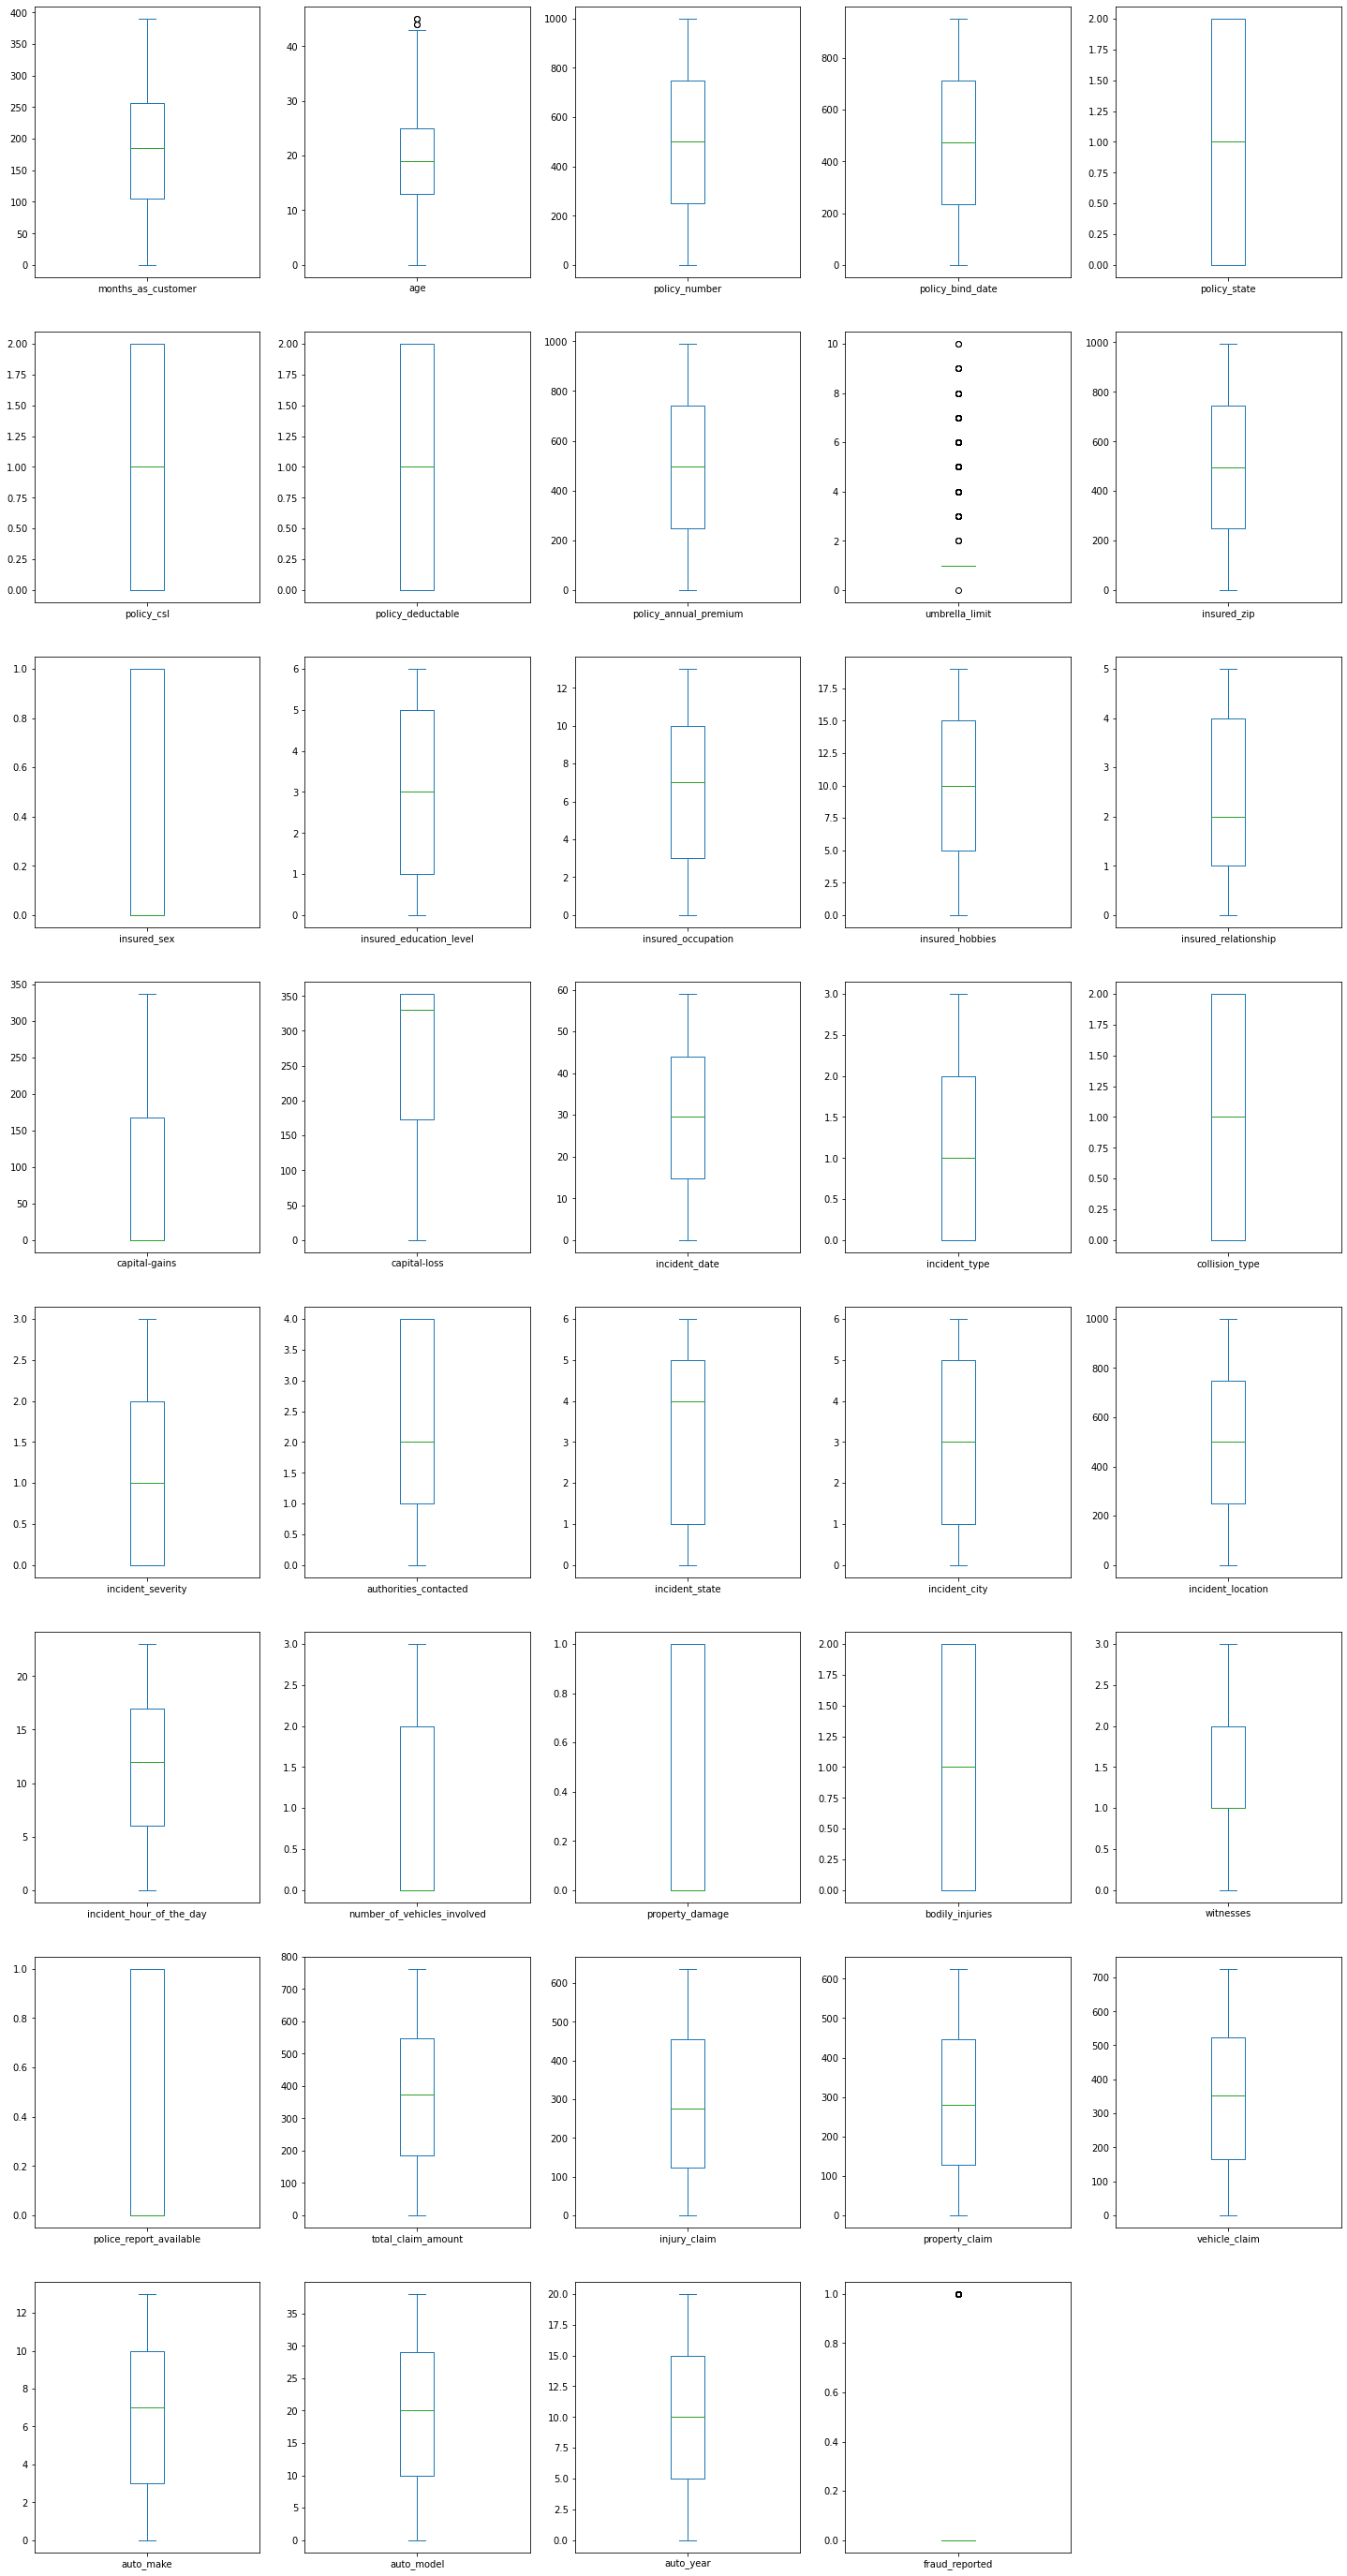

In [51]:
df.plot(kind='box', subplots = True, layout = (8,5), figsize = (25,50))

In [52]:
df.shape

(1000, 39)

In [53]:
from scipy.stats import zscore
z = np.abs(zscore(df))
df.shape

(1000, 39)

In [54]:
df1 = df[(z<3).all(axis = 1)]
df.shape
df1.shape

(985, 39)

In [55]:
loss = ((1000-985)/1000)*100
loss

1.5

In [56]:
X = df1.drop(['fraud_reported'], axis =1)
Y = df1['fraud_reported']

# Skewness

In [57]:
df1.skew()

months_as_customer             0.096656
age                            0.480506
policy_number                  0.004961
policy_bind_date               0.000778
policy_state                  -0.036054
policy_csl                     0.093953
policy_deductable              0.060667
policy_annual_premium         -0.001693
umbrella_limit                 1.902038
insured_zip                    0.005475
insured_sex                    0.144759
insured_education_level        0.004685
insured_occupation            -0.052412
insured_hobbies               -0.061536
insured_relationship           0.077333
capital-gains                  0.880109
capital-loss                  -0.807319
incident_date                  0.004798
incident_type                  0.091063
collision_type                -0.032563
incident_severity              0.281858
authorities_contacted         -0.113349
incident_state                -0.151360
incident_city                  0.045660
incident_location             -0.003796


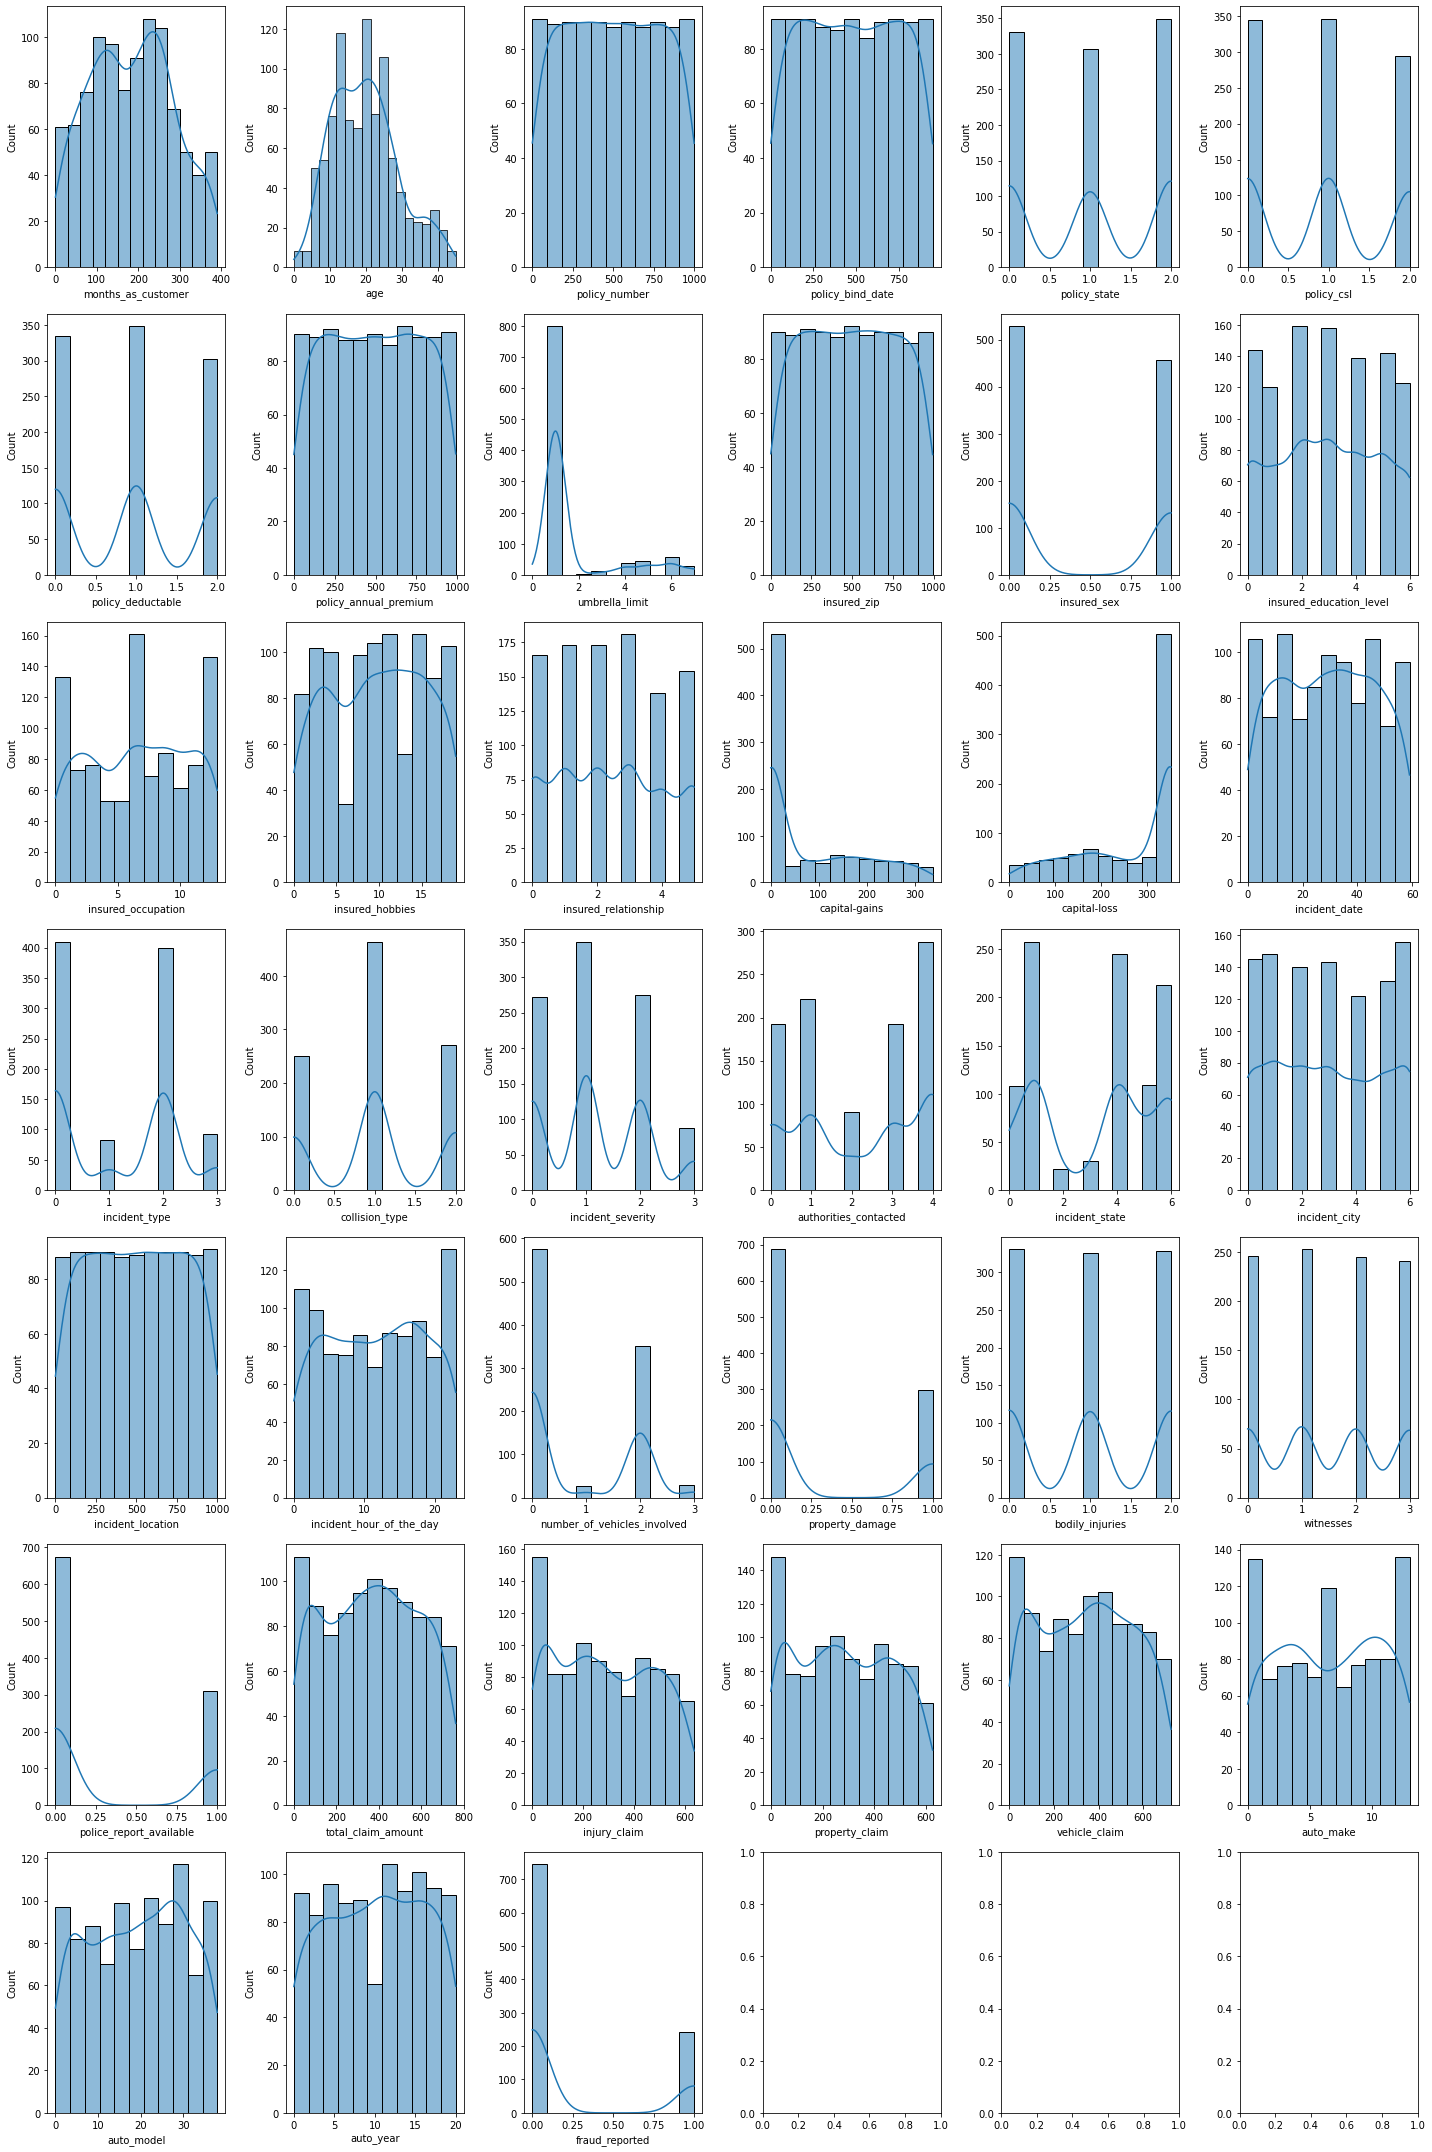

In [58]:
fig, ax = plt.subplots(ncols = 6, nrows=7, figsize = (20,30))
index = 0
ax = ax.flatten()

for col, value in df1.items():
    if col!= 'type':
        sns.histplot(data = df1, x = col, ax= ax[index], kde = True)
        index +=1
plt.tight_layout()

In [59]:
df1.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,...,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.00000
mean,184.352284,19.939086,498.795939,474.635533,1.019289,0.948223,0.966497,495.289340,1.797970,495.782741,...,1.488325,0.315736,368.105584,289.130964,287.948223,346.727919,6.564467,19.229442,10.129949,0.24467
std,100.120044,9.178799,289.514585,276.079088,0.830463,0.804181,0.803887,286.750175,1.740478,286.712827,...,1.113533,0.465044,217.933847,189.282143,182.730355,209.173619,4.033417,11.125949,6.019731,0.43011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,105.000000,13.000000,248.000000,233.000000,0.000000,0.000000,0.000000,245.000000,1.000000,248.000000,...,1.000000,0.000000,183.000000,123.000000,129.000000,163.000000,3.000000,10.000000,5.000000,0.00000
50%,185.000000,19.000000,499.000000,473.000000,1.000000,1.000000,1.000000,496.000000,1.000000,496.000000,...,1.000000,0.000000,371.000000,276.000000,281.000000,351.000000,7.000000,20.000000,10.000000,0.00000
75%,258.000000,25.000000,750.000000,715.000000,2.000000,2.000000,2.000000,743.000000,1.000000,743.000000,...,2.000000,1.000000,547.000000,455.000000,446.000000,522.000000,10.000000,29.000000,15.000000,0.00000
max,390.000000,45.000000,999.000000,950.000000,2.000000,2.000000,2.000000,990.000000,7.000000,994.000000,...,3.000000,1.000000,762.000000,637.000000,625.000000,725.000000,13.000000,38.000000,20.000000,1.00000


In [60]:
from sklearn.preprocessing import power_transform
X = power_transform(X, method = 'yeo-johnson')
X

array([[ 1.10518143,  0.99373915,  0.03987181, ...,  0.85505096,
        -1.8077551 , -0.11020813],
       [ 0.3417534 ,  0.42295985, -0.75497988, ...,  0.4130101 ,
        -0.57625941,  0.36452867],
       [-0.53337777, -1.11449917,  0.63752986, ..., -0.56194315,
         0.95250811,  0.36452867],
       ...,
       [-0.57605649, -0.45538469,  1.29041783, ...,  1.06800364,
         0.05568689, -1.61571923],
       [ 1.74027314,  2.14648084,  0.10504439, ..., -1.44475528,
        -1.29884413, -1.18308501],
       [ 1.73236585,  1.99358851,  0.17905325, ...,  0.4130101 ,
        -0.57625941,  0.36452867]])

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 1.10518143,  0.99373915,  0.03987181, ...,  0.85505096,
        -1.8077551 , -0.11020813],
       [ 0.3417534 ,  0.42295985, -0.75497988, ...,  0.4130101 ,
        -0.57625941,  0.36452867],
       [-0.53337777, -1.11449917,  0.63752986, ..., -0.56194315,
         0.95250811,  0.36452867],
       ...,
       [-0.57605649, -0.45538469,  1.29041783, ...,  1.06800364,
         0.05568689, -1.61571923],
       [ 1.74027314,  2.14648084,  0.10504439, ..., -1.44475528,
        -1.29884413, -1.18308501],
       [ 1.73236585,  1.99358851,  0.17905325, ...,  0.4130101 ,
        -0.57625941,  0.36452867]])

In [62]:
X = pd.DataFrame(X)

In [63]:
Y.value_counts()

0    744
1    241
Name: fraud_reported, dtype: int64

In [64]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X, Y = ros.fit_resample(X,Y)
Y.value_counts()

1    744
0    744
Name: fraud_reported, dtype: int64

# Train test Split

In [65]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [66]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_train, Y_train = ros.fit_resample(X_train,Y_train)

In [67]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(lr, X, Y, cv = None)
cvs.mean()

[[118  30]
 [ 34 116]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       148
           1       0.79      0.77      0.78       150

    accuracy                           0.79       298
   macro avg       0.79      0.79      0.79       298
weighted avg       0.79      0.79      0.79       298

0.785234899328859


0.7567419158023185

In [68]:
#SVC

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
pred = svc.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(svc, X, Y, cv = None)
cvs.mean()

[[124  24]
 [  9 141]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       148
           1       0.85      0.94      0.90       150

    accuracy                           0.89       298
   macro avg       0.89      0.89      0.89       298
weighted avg       0.89      0.89      0.89       298

0.889261744966443


0.8662983300567193

In [69]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(knn, X, Y, cv = None)
cvs.mean()

[[ 89  59]
 [ 34 116]]
              precision    recall  f1-score   support

           0       0.72      0.60      0.66       148
           1       0.66      0.77      0.71       150

    accuracy                           0.69       298
   macro avg       0.69      0.69      0.69       298
weighted avg       0.69      0.69      0.69       298

0.6879194630872483


0.702998666757056

In [70]:
#DescisonTree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
pred = dt.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(dt, X, Y, cv = None)
cvs.mean()

[[127  21]
 [  6 144]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       148
           1       0.87      0.96      0.91       150

    accuracy                           0.91       298
   macro avg       0.91      0.91      0.91       298
weighted avg       0.91      0.91      0.91       298

0.9093959731543624


0.9113122274196099

In [71]:
#RandomForest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
pred = rf.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(rf, X, Y, cv = None)
cvs.mean()

[[128  20]
 [  2 148]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       148
           1       0.88      0.99      0.93       150

    accuracy                           0.93       298
   macro avg       0.93      0.93      0.93       298
weighted avg       0.93      0.93      0.93       298

0.9261744966442953


0.9187128556256073

# Hyperparameter Tuning 

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [73]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 900, num = 10)]
max_features = ['auto', "sqrt", 'log2']
max_depth    = [int(x) for x in np.linspace(35, 900, 10)]
min_samples_split = [2, 4, 10, 15]
min_samples_leaf  = [10, 20, 300, 400]

random_grid = {"n_estimators" : n_estimators,
               "max_features" : max_features,
               "max_depth" : max_depth,
                "min_samples_split" : min_samples_split,
                "min_samples_leaf" : min_samples_leaf,
                "criterion" : ['gini', 'entropy']}
print(random_grid)

{'n_estimators': [10, 108, 207, 306, 405, 504, 603, 702, 801, 900], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [35, 131, 227, 323, 419, 515, 611, 707, 803, 900], 'min_samples_split': [2, 4, 10, 15], 'min_samples_leaf': [10, 20, 300, 400], 'criterion': ['gini', 'entropy']}


In [74]:
rf = RandomForestClassifier()
rscv = RandomizedSearchCV(estimator = rf,
                         param_distributions = random_grid,
                         verbose = 2,
                         cv = 10,
                         n_jobs = -1)

rscv.fit(X_train, Y_train)
rscv

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [35, 131, 227, 323, 419,
                                                      515, 611, 707, 803, 900],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [10, 20, 300, 400],
                                        'min_samples_split': [2, 4, 10, 15],
                                        'n_estimators': [10, 108, 207, 306, 405,
                                                         504, 603, 702, 801,
                                                         900]},
                   verbose=2)

In [75]:
rscv.best_params_

{'n_estimators': 900,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 515,
 'criterion': 'entropy'}

In [76]:
rscv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=515, max_features='auto',
                       min_samples_leaf=10, min_samples_split=10,
                       n_estimators=900)

In [77]:
best_gscv = rscv.best_estimator_

In [78]:
pred = best_gscv.predict(X_test)

In [79]:
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(rscv, X, Y, cv = 10)
cvs.mean()

[[125  23]
 [  8 142]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       148
           1       0.86      0.95      0.90       150

    accuracy                           0.90       298
   macro avg       0.90      0.90      0.90       298
weighted avg       0.90      0.90      0.90       298

0.8959731543624161
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


0.876396698712135

In [80]:
#GridSCV

gridcv_grid = {"n_estimators" :[rscv.best_params_['n_estimators']],
               
               "max_features" : [rscv.best_params_['max_features']],
               
               "max_depth" :[rscv.best_params_['max_depth']],
               
               "min_samples_split" :  [rscv.best_params_['min_samples_split'],
                                       rscv.best_params_['min_samples_split']+2,
                                       rscv.best_params_['min_samples_split']+4,
                                       rscv.best_params_['min_samples_split']+6],
               
               "min_samples_leaf" : [rscv.best_params_['min_samples_leaf'],
                                     rscv.best_params_['min_samples_leaf']+2,
                                     rscv.best_params_['min_samples_leaf']+4,
                                     rscv.best_params_['min_samples_leaf']+6],}
print(gridcv_grid)

{'n_estimators': [900], 'max_features': ['auto'], 'max_depth': [515], 'min_samples_split': [10, 12, 14, 16], 'min_samples_leaf': [10, 12, 14, 16]}


In [81]:
rf = RandomForestClassifier()
gscv = GridSearchCV(estimator = rf, 
                          param_grid= gridcv_grid, 
                          cv = 5, 
                          verbose = 2, 
                          n_jobs = -1)

#fitting
gscv.fit(X_train, Y_train)
gscv

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [515], 'max_features': ['auto'],
                         'min_samples_leaf': [10, 12, 14, 16],
                         'min_samples_split': [10, 12, 14, 16],
                         'n_estimators': [900]},
             verbose=2)

In [82]:
gscv.best_estimator_

RandomForestClassifier(max_depth=515, max_features='auto', min_samples_leaf=10,
                       min_samples_split=12, n_estimators=900)

In [83]:
best_gscv = gscv.best_estimator_
pred = best_gscv.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(gscv, X, Y, cv = 10)
cvs.mean()

[[125  23]
 [  9 141]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.89       148
           1       0.86      0.94      0.90       150

    accuracy                           0.89       298
   macro avg       0.90      0.89      0.89       298
weighted avg       0.90      0.89      0.89       298

0.8926174496644296
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


0.8810946852893162

# Stratified K-Fold Cross validation

In [84]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 10)
skf.split(X,Y)

<generator object _BaseKFold.split at 0x000001AB831A5820>

In [85]:
accuracy= []

skf = StratifiedKFold(n_splits=10, random_state = None)
skf.get_n_splits(X,Y)

#X is the feature set and Y is the target
#Putiing train_index and test_index of X and Y

for train_index, test_index in skf.split(X,Y):
    print('Train:', train_index, 'Validation:', test_index)
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
    Y1_train, Y1_test = Y.iloc[train_index], Y.iloc[test_index]
    
rscv.fit(X1_train, Y1_train)
pred = rscv.predict(X1_test)
score = accuracy_score(pred, Y1_test)
accuracy.append(score)

Train: [ 102  104  107 ... 1485 1486 1487] Validation: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 103 105 106 108 113 116
 117 123 124 130 138 140 141 143 144 147 149 150 158 161 166 178 180 183
 191 201 208 209 210 213 215 222 229 232 236 240 242 245 246 248 249 252
 254 256 260 266 271]
Train: [   0    1    2 ... 1485 1486 1487] Validation: [102 104 107 109 110 111 112 114 115 118 119 120 121 122 125 126 127 128
 129 131 132 133 134 135 136 137 139 142 145 146 148 151 152 153 154 155
 156 157 159 160 162 163 164 165 167 168 169 170 171 172 173 174 175 176
 177 179 181 182 184 185 186 187 188 189 190 192 193 194 195 196 

In [86]:
np.array(accuracy).mean()

0.9054054054054054

In [87]:
import pickle
filename = 'Insurance Fraud Detection.pkl'
pickle.dump(rf, open(filename, 'wb'))